## Assignment 2


Distance between PDFs: In this question you will explore the other “distances” between PDFs discussed in class. To verify the implementation of these distances, use the normalized histogram of the stereo image pair (left.png, right.png) used in the previous assignment.

(a) Cross Entropy (CE): The cross entropy between two PDFs (PMFs) $p$ and $q$ is given by: $H(p, q) = H(p) + D(p\|q)$ where $H(p)$ is the entropy of $p$ and $D(p\|q)$ is the KL divergence between $p$ and $q$. Write a function that accepts two PDFs (PMFs) $p$, $q$ and outputs the CE between them.

i. Verify your function using the stereo image normalized histogram pair.

ii. As with the KL divergence problem, choose a fixed PMF $p \sim \text{Bern}(r)$. Choose another PMF $q \sim \text{Bern}(s)$ where s can be varied. Plot $H(p, q)$ as a function of $s$. From the plot, does minimizing $H(p, q)$ give us matched PMFs?

(b) Jensen Shannon (JS) Divergence: The definition of JS divergence between two PDFs $p$ and $q$ is given by: $J(p, q) = 0.5 ∗ (D(p\|m) + D(q\|m))$ where $m = {{p+q}\over2}$ and $D(p\|q)$ is the KL divergence between $p$ and $q$. Write a function that accepts two PDFs (PMFs) $p$, $q$ and outputs the JS divergence between them. Verify that the $JS(p, q)$ is symmetric indeed while $D(p\|q)$ is not. Again, use the normalized histograms of the stereo image pair.

(c) Wasserstein Distance: The Wasserstein-1 distance between two PDFs $r$ and $s$ is given by: $W_1(r,s) = \inf_{\pi \in \Pi} (r,s) E(x,y)∼π|x − y|$. The set Π(r,s) is composed of all bivariate joint PDFs whose marginals equal $r$ and $s$. Given a tuple $(p_{(X,Y)},r_X,s_Y)$ of a joint histogram $p(X,Y)$, and marginals $r_X$,$s_Y$, write a function that accepts this tuple and checks if p(X,Y) ∈ Π(r,s). Verify your function with a positive example and a negative example.

In [234]:
import numpy as np

def entropy(pmf):
    """
    Computes the entropy of a discrete random variable with probability mass function pmf
    H(X) = -sum(p(x)log(p(x)))
    """
    if(np.sum(pmf) - 1 > 1e-6):  #Floating point error
        raise ValueError("The sum of the probabilities must be equal to 1")
    
    entropy = 0
    for p in pmf:
        if p > 0:
            entropy -= p * np.log2(p)
    return entropy

def KL_Divergence(p, q):
    """
    Computes the Kullback-Leibler Divergence between two probability mass functions p and q
    D_KL(p||q) = sum(p(x)log(p(x)/q(x)))
    """
    if(np.sum(p) - 1 > 1e-6 or np.sum(q) - 1 > 1e-6):
        raise ValueError("The sum of the probabilities must be equal to 1")
    if(len(p) != len(q)):
        raise ValueError("The length of the probability mass functions must be equal")
    
    KL_divergence = 0
    for i in range(len(p)):
        if p[i] > 0 and q[i] > 0:
            KL_divergence += p[i] * np.log2(p[i]/q[i])
        elif p[i] > 0 and q[i] == 0: #p*log(p/0) = infinity
            return np.inf
        elif p[i] == 0 and q[i] > 0:
            KL_divergence += 0 #0*log(0/q) = 0   
        elif p[i] == 0 and q[i] == 0:
            KL_divergence += 0 #0*log(0/0) = 0     
            
    return KL_divergence

def normalized_histogram(image):
    if len(image.shape)!=2: 
        raise ValueError("Input image is not grayscale")

    image = np.round(image*255).astype(np.uint8)
    
    height, width = image.shape
    histogram = np.zeros(256)
    for i in range(height):
        for j in range(width):
            histogram[image[i,j]] += 1
        
    histogram = histogram/(height*width)
    
    return histogram

In [235]:
def Cross_Entropy(p, q):
    """
    Computes the cross entropy between two probability mass functions p and q
    H(p, q) = H(p) + D_KL(p||q)
    """
    return entropy(p) + KL_Divergence(p, q)

In [236]:
import matplotlib.pyplot as plt

image_left = plt.imread("left.png")
image_right = plt.imread("right.png")

left_histogram = normalized_histogram(image_left)
right_histogram = normalized_histogram(image_right)

cross_entropy_lr = Cross_Entropy(left_histogram, right_histogram)
cross_entropy_rl = Cross_Entropy(right_histogram, left_histogram)

print("Cross Entropy from left to right: ", cross_entropy_lr)
print("Cross Entropy from right to left: ", cross_entropy_rl)

Cross Entropy from left to right:  7.273398119987328
Cross Entropy from right to left:  7.293035317529478


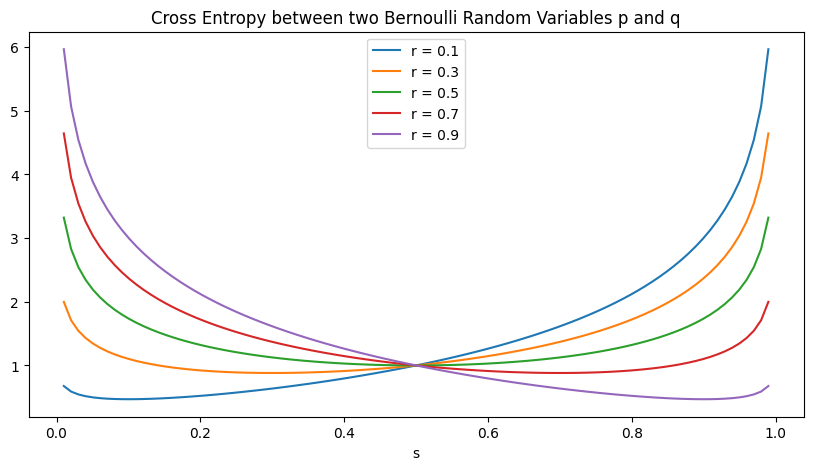

In [237]:
r_list = [0.1, 0.3, 0.5, 0.7, 0.9]
s_range = np.linspace(0,1,100)

cross_entropy_list = []
for r in r_list:
    cross_entropy_temp = []
    for s in s_range:
        p = np.array([r, 1-r])
        q = np.array([s, 1-s])
        cross_entropy_temp.append(Cross_Entropy(p, q))
    cross_entropy_list.append(cross_entropy_temp)

plt.figure(figsize=(10,5))
for i in range(len(r_list)):
    plt.plot(s_range, cross_entropy_list[i], label = f"r = {r_list[i]}")
plt.title("Cross Entropy between two Bernoulli Random Variables p and q") 
plt.xlabel("s")
plt.legend()
plt.show()

In [238]:
optimal_s = []
for i in range(len(r_list)):
    optimal_s.append(s_range[np.argmin(cross_entropy_list[i])])
    print(f"For r = {r_list[i]}, the optimal s is {optimal_s[i]}")

For r = 0.1, the optimal s is 0.10101010101010102
For r = 0.3, the optimal s is 0.30303030303030304
For r = 0.5, the optimal s is 0.494949494949495
For r = 0.7, the optimal s is 0.696969696969697
For r = 0.9, the optimal s is 0.8989898989898991


From the obtained values of s corresponding to minimum cross entropy for a fixed r, it is clear that minimizing $H(p, q)$ gives matched PMFs. The same can be seen through the plots as well.

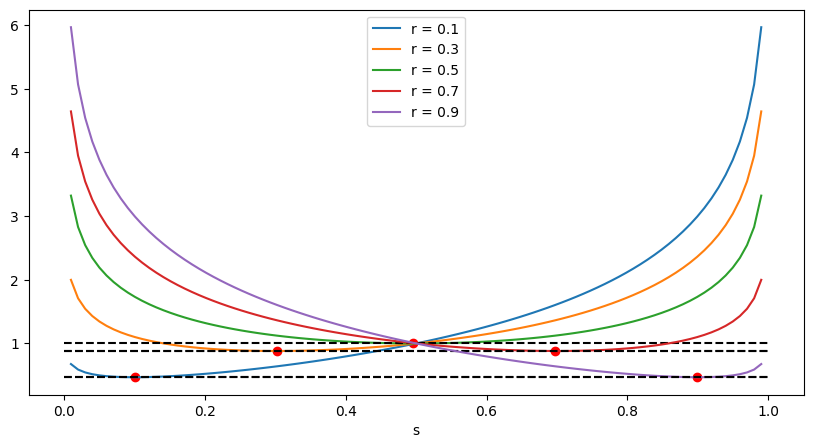

In [239]:
plt.figure(figsize=(10,5))
for i in range(len(r_list)):
    plt.plot(s_range, cross_entropy_list[i], label = f"r = {r_list[i]}")
    plt.hlines(Cross_Entropy([r_list[i], 1-r_list[i]], [optimal_s[i], 1-optimal_s[i]]), 0, 1, colors='k', linestyles='dashed')
    plt.scatter(optimal_s[i], Cross_Entropy([r_list[i], 1-r_list[i]], [optimal_s[i], 1-optimal_s[i]]), color = 'r')
plt.xlabel("s")
plt.legend()
plt.show()

Note that the minimum value obtained is the same as Cross Entropy is symmetric about $x = 0.5$ (Bernoulli).

In [240]:
def JS_Divergence(p, q):
    """
    Computes the Jensen-Shannon Divergence between two probability mass functions p and q
    D_JS(p||q) = (D_KL(p||m) + D_KL(q||m))*0.5
    where m = (p+q)/2
    """
    m = (p + q)/2
    return 0.5*(KL_Divergence(p, m) + KL_Divergence(q, m))

In [241]:
#Example of symmetry of JS Divergence as opposed to KL Divergence
"""
As we can consider any random variable as a probability mass function, we can consider the following example
p~Bernoulli(r) and q~Bernoulli(s)
"""
p = np.array([0.4, 0.6])
q = np.array([0.5, 0.5])
print("JS Divergence between p and q: ", JS_Divergence(p, q))
print("JS Divergence between q and p: ", JS_Divergence(q, p))
print("KL Divergence between p and q: ", KL_Divergence(p, q))
print("KL Divergence between q and p: ", KL_Divergence(q, p)) 

JS Divergence between p and q:  0.007299156760473963
JS Divergence between q and p:  0.007299156760473963
KL Divergence between p and q:  0.029049405545331364
KL Divergence between q and p:  0.029446844526784283


From the values obtained, it can be seen that JS Divergence is symmetric but KL Divergence.

In [242]:
import matplotlib.pyplot as plt

image_left = plt.imread("left.png")
image_right = plt.imread("right.png")

left_histogram = normalized_histogram(image_left)
right_histogram = normalized_histogram(image_right)

JS_divergence_lr = JS_Divergence(left_histogram, right_histogram)
JS_divergence_rl = JS_Divergence(right_histogram, left_histogram)

print("JS Divergence from left to right: ", JS_divergence_lr)
print("JS Divergence from right to left: ", JS_divergence_rl)

JS Divergence from left to right:  0.0036730397693148257
JS Divergence from right to left:  0.0036730397693148257


In [243]:
def valid_joint_pmf(joint_pmf, p, q):
    if(np.sum(p) - 1 > 1e-6 or np.sum(q) - 1 > 1e-6):
        raise ValueError("The sum of the probabilities must be equal to 1")
    if(len(p) != len(q)):
        raise ValueError("The length of the probability mass functions must be equal")
    
    if(np.sum(joint_pmf) - 1 > 1e-6):
        return False
    if(joint_pmf.shape != (len(p), len(q))):
        return False

    marginal_p = np.sum(joint_pmf, axis=1)
    marginal_q = np.sum(joint_pmf, axis=0)

    if np.any(np.abs(marginal_p - p) > 1e-6) or np.any(np.abs(marginal_q - q) > 1e-6):
        return False
    return True

In [244]:
#Positive example of valid joint pmf
p = np.array([0.4, 0.6])
q = np.array([0.5, 0.5])
joint_pmf = np.array([[0.2, 0.2], [0.3, 0.3]])
print("Is the joint pmf valid? ", valid_joint_pmf(joint_pmf, p, q))

Is the joint pmf valid?  True


In [245]:
#Negative example of valid joint pmf
p = np.array([0.4, 0.6])
q = np.array([0.5, 0.5])
joint_pmf = np.array([[0.1, 0.3], [0.5, 0.1]])
print("Is the joint pmf valid? ", valid_joint_pmf(joint_pmf, p, q))

Is the joint pmf valid?  False


Visualizing Data Using t-SNE:

(a) Read the t-SNE paper and answer the following questions. Do not reproduce text from the paper verbatim in your answers.

i. What is the crowding problem? 

ii. How does the choice of the Student t-distribution in the low dimensional embedding space help address the crowding problem? 

iii. What other important changes have been made in t-SNE relative to SNE? 

(b) In this problem, implement Algorithm 1 from the paper, albeit in a simplified setting as described in the following:

i. Generate two clusters of points from a ten-dimensional multivariate Gaussian (MVG) distribution N (μ, 0.01 · I) where I is the ten-dimensional identity matrix.

ii. Use μ1 = 1 for one cluster and μ2 = 10 · 1 for the other (where 1 is the ten-dimensional vector of ones).

iii. Generate 10 points from each cluster for a total of 20 points to form the set X .

iv. Choose the dimension of the embedding to be two.

v. Choose T = 50.

vi. Experiment with different choices for η and α(t). For simplicity, let α(t) not change with iterations.

vii. Use your knowledge of how X was generated for choices of σi (as opposed to finding them using the user-defined Perplexity).

viii. Plot the points in Y at the beginning and at the end of 50 iterations. Print your observations from the plots.

ix. Find and print D(P||Q) at the beginning and at the end of 50 iterations. Print your observations from these values.

x. The YouTube video by the first author Laurens van der Maaten can be found here.

(c) Now, experiment with the built-in t-SNE utility in matplotlib. Choose four different perplexity values (between 5 and 50) and generate t-SNE plots for these choices. How does perplexity affect the plots?

(a)

i. Consider an objective to project points from a higher dimensional space (say n) to a lower dimensional space (say m) such that the distance between any two points in the spaces is conserved (to the highest extent). It is known that an n-dimensional space can have n+1 mutually equidistant points. If this n-dimensional space is projected to the lower, m-dimensional space, the feature of similarity in distance cannot be conserved perfectly as the maximum number of mutually equidistant points in the new space is m+1. This results in distortion in the distances i.e, some points that were equidistant in the higher dimensions would appear closer or farther in the lower dimensional space. This means that the density of points in the low dimensional space does not reflect the true local density of points in the high dimensional space. This is the crowding problem.

ii. SNE makes use of Gaussian distributions in the higher and lower dimensional spaces. t-SNE on the other hand, makes use of Student t-distribution with one degree of freedom in the low-dimensional map. As the Cauchy Distribution (Student-t distribution with one degree of freedom is the same as a Cauchy Distribution) has a much heavier tail then the Gaussian distribution, higher probabilities are assigned to points that are farther apart in the low dimensional space. This helps in spreading out the distant points, which helps address the crowding problem. 

iii. Apart from the use of Student t-distribution with one degree of freedom in the low-dimensional map, following are some changes made in t-SNE relative to SNE:

1. Use of symmetric SNE to compute the joint distributions of higher dimensional and lower dimensional spaces (as opposed to conditional distributions in SNE).

2. Use of early compression in the loss function (Addition of L2-penalty to the cost function to penalize large values in the embedding coordinates and bring the points closer to center, resulting in simpler movement through the data structure).

3. Use of optimisation techniques for faster convergence - momentum and early exaggeration (multiplication of all p<sub>ij</sub> by a constant to give more separated clusters.) 
 

In [246]:
import numpy as np

def pairwise_square_distance(data):
    sum_squared = np.sum(np.square(data), axis=1)  # ||x_i||^2; Shape: (N,)
    sum_squared = sum_squared.reshape(-1, 1)  # Shape: (N, 1)
    distance = sum_squared + sum_squared.T - 2 * np.dot(data, data.T)  # ||x_i - x_j||^2; Shape: (N, N)
    distance = np.maximum(distance, 0)  # To avoid negative values due to floating point errors
    return distance

def Perplexity(X, sigma=0.01):
    N, D = X.shape
    pairwise_square_dist = pairwise_square_distance(X)  # Compute pairwise distance D_ij^2 = ||x_i - x_j||^2
    P = np.exp(-pairwise_square_dist / (2 * sigma))  # Compute joint probability P_ij = exp(-D_ij^2/2*sigma^2)
    np.fill_diagonal(P, 0)  # Set diagonal elements to 0 i.e., P_ii = 0
    for i in range(P.shape[0]):
        P[i] /= np.sum(P[i])  # Normalize P_i
    P = (P + P.T) / (2 * N)  # Symmetrize P_ij and normalize
    return P

def Q_ij(Y):
    pairwise_square_dist = pairwise_square_distance(Y)  # Compute pairwise distance D_ij^2 = ||y_i - y_j||^2
    q_ij = 1 / (1 + pairwise_square_dist)  # Compute joint probability Q_ij = 1 / (1 + D_ij^2)
    np.fill_diagonal(q_ij, 0)  # Set diagonal elements to 0 i.e., Q_ii = 0
    q_ij /= np.sum(q_ij) # Normalising
    return q_ij 

def t_SNE(X, sigma=1, num_iter=50, learning_rate=100, momentum=0.8, embedding_dim=2):
    N, D = X.shape
    p_ij = Perplexity(X, sigma)  # Compute conditional probability P_j|i
    # Initialize Y from Gaussian(0, 1e-4*I)
    Y = np.random.multivariate_normal(np.zeros(embedding_dim), 1e-4 * np.eye(embedding_dim), N)
    Y_prev = np.zeros_like(Y)  # Initialize previous Y to zeros

    KL_Div = []  # To store KL divergence over iterations

    for i in range(num_iter):
        q_ij = Q_ij(Y)  # Compute Q_ij distribution
        KL_Div.append(KL_Divergence(p_ij.flatten(), q_ij.flatten()))  # Compute and store KL divergence

        # Compute gradient
        grad = np.zeros((N, embedding_dim))
        inv_dist = 1 / (1 + pairwise_square_distance(Y))  # Weight term for gradient
        for j in range(N):
            const = (p_ij[j] - q_ij[j]) * inv_dist[j]  # (P_ij - Q_ij) * (1 + ||y_i - y_j||^2)^-1
            grad[j] = 4 * np.sum(const.reshape(-1, 1) * (Y[j] - Y), axis=0)  # Gradient update

        # Update Y
        Y_new = Y - learning_rate * grad + momentum * (Y - Y_prev)  # Update Y with momentum
        Y_prev = Y  # Update previous Y
        Y = Y_new  # Assign new Y

    return Y, KL_Div


In [247]:
import numpy as np
import matplotlib.pyplot as plt

#Defining the two clusters
dimension = 10
mean1 = np.ones(dimension)
mean2 = 10*np.ones(dimension)
cov = 0.01*np.eye(dimension)
num_points = 10

cluster1 = np.random.multivariate_normal(mean1, cov, num_points)
cluster2 = np.random.multivariate_normal(mean2, cov, num_points)

#Defining the set of points
X = np.concatenate((cluster1, cluster2), axis = 0)
num_points_X = X.shape[0]

embedding_dimension = 2 #t-SNE embedding dimension

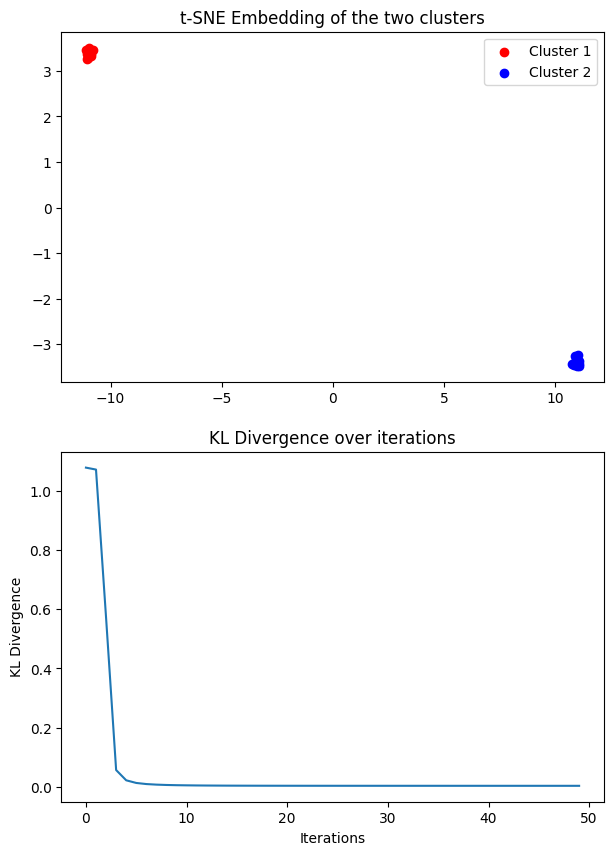

In [248]:
T = 50
lr = 50
sigma = 1
momentum = 0.8

Y, KL_Div = t_SNE(X, sigma, T, lr, momentum, embedding_dimension)

plt.figure(figsize=(7,10))
plt.subplot(2,1,1)
plt.scatter(Y[:num_points, 0], Y[:num_points, 1], color='r', label='Cluster 1')
plt.scatter(Y[num_points:, 0], Y[num_points:, 1], color='b', label='Cluster 2')
plt.legend()
plt.title(f"t-SNE Embedding of the two clusters")

plt.subplot(2,1,2)
plt.plot(KL_Div)
plt.title("KL Divergence over iterations")
plt.xlabel("Iterations")
plt.ylabel("KL Divergence")
plt.show()

In [249]:
print("The KL Divergence before any iteration is: ", KL_Div[0])
print("The KL Divergence after the last iteration is: ", KL_Div[-1])

The KL Divergence before any iteration is:  1.0787803633833186
The KL Divergence after the last iteration is:  0.0033619309290165425


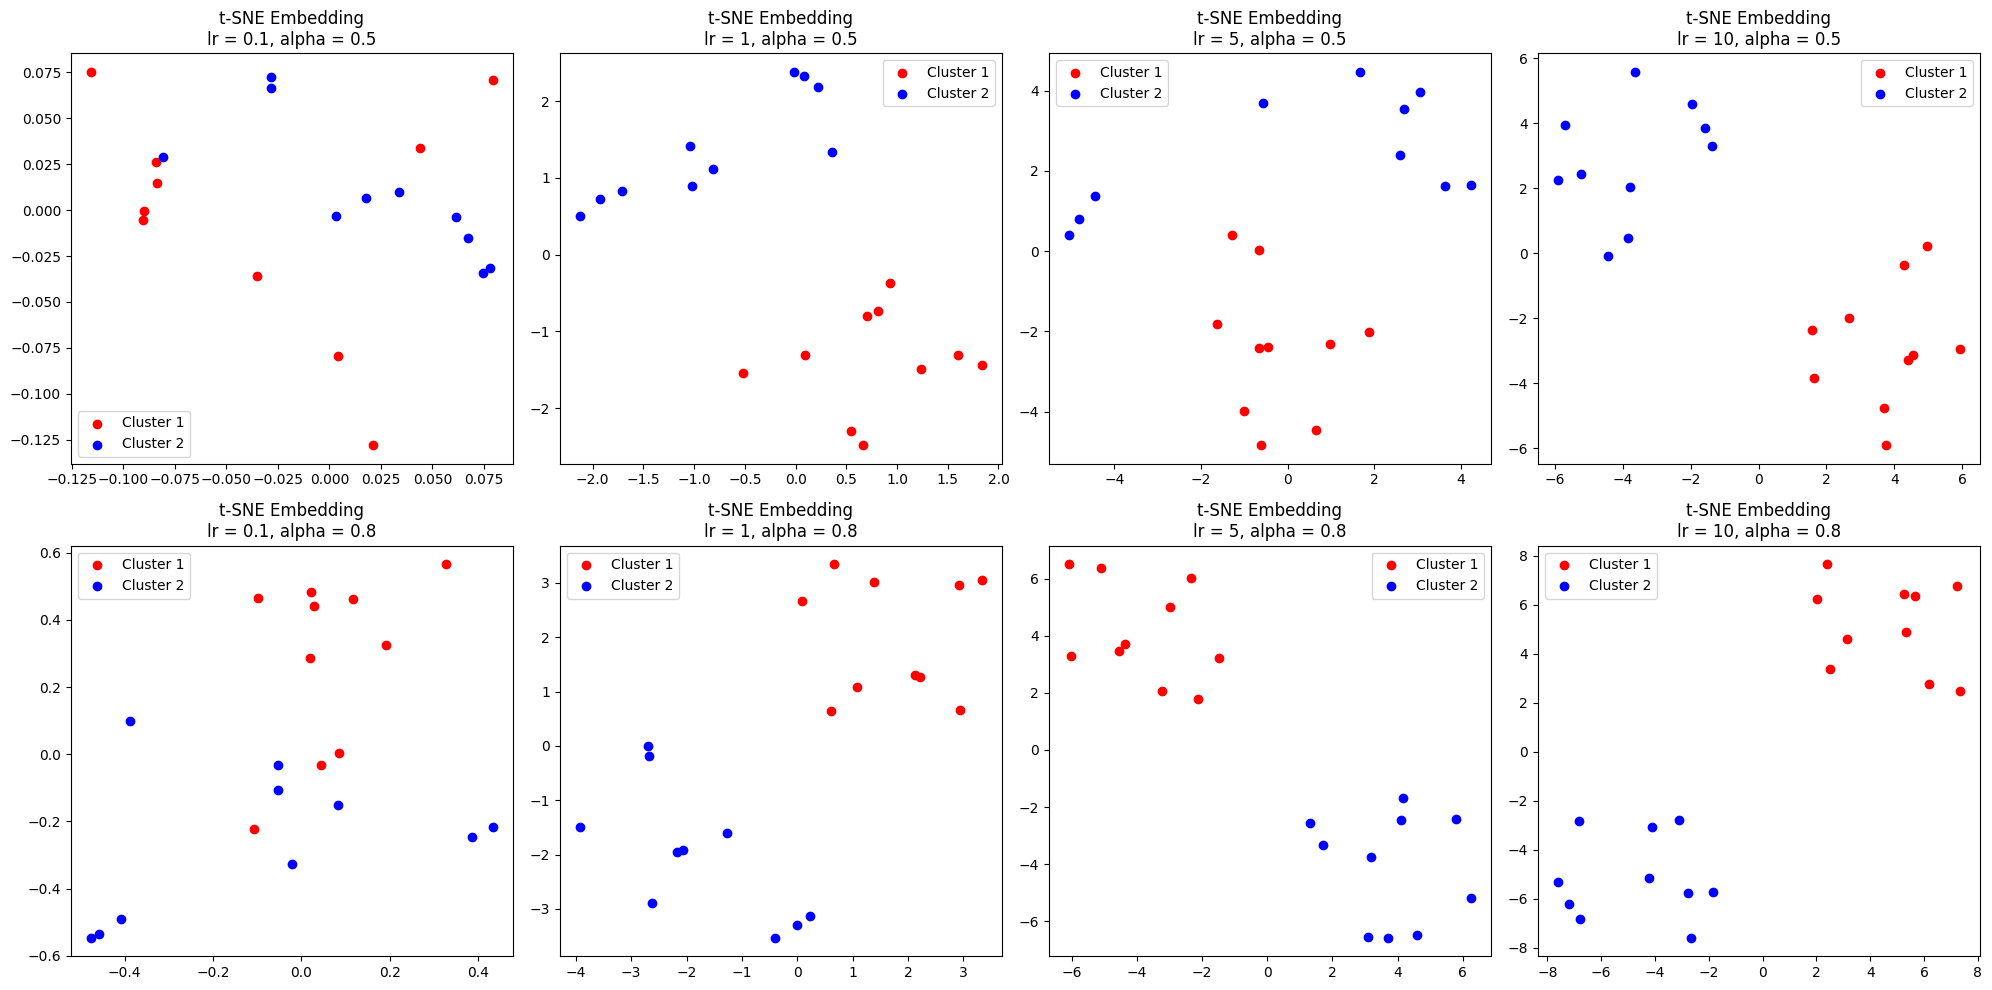

In [250]:
import matplotlib.pyplot as plt

T = 50 #Numbber of iterations

lr = [0.1, 1, 5, 10, 0.1, 1, 5, 10]  # Learning rates
alpha = [0.5, 0.5, 0.5, 0.5, 0.8, 0.8, 0.8, 0.8]  # Momentum values

plt.figure(figsize=(20, 10))

for i in range(len(lr)):
    Y, KL_Div = t_SNE(X, 0.01, num_iter=T, learning_rate=lr[i], momentum=alpha[i], embedding_dim=embedding_dimension)
    plt.subplot(2, 4, i + 1)
    plt.scatter(Y[:num_points, 0], Y[:num_points, 1], color='r', label='Cluster 1')
    plt.scatter(Y[num_points:, 0], Y[num_points:, 1], color='b', label='Cluster 2')
    plt.title(f"t-SNE Embedding\nlr = {lr[i]}, alpha = {alpha[i]}")
    plt.legend()

plt.tight_layout()  # Adjusts subplot parameters to fit into the figure area.
plt.show()

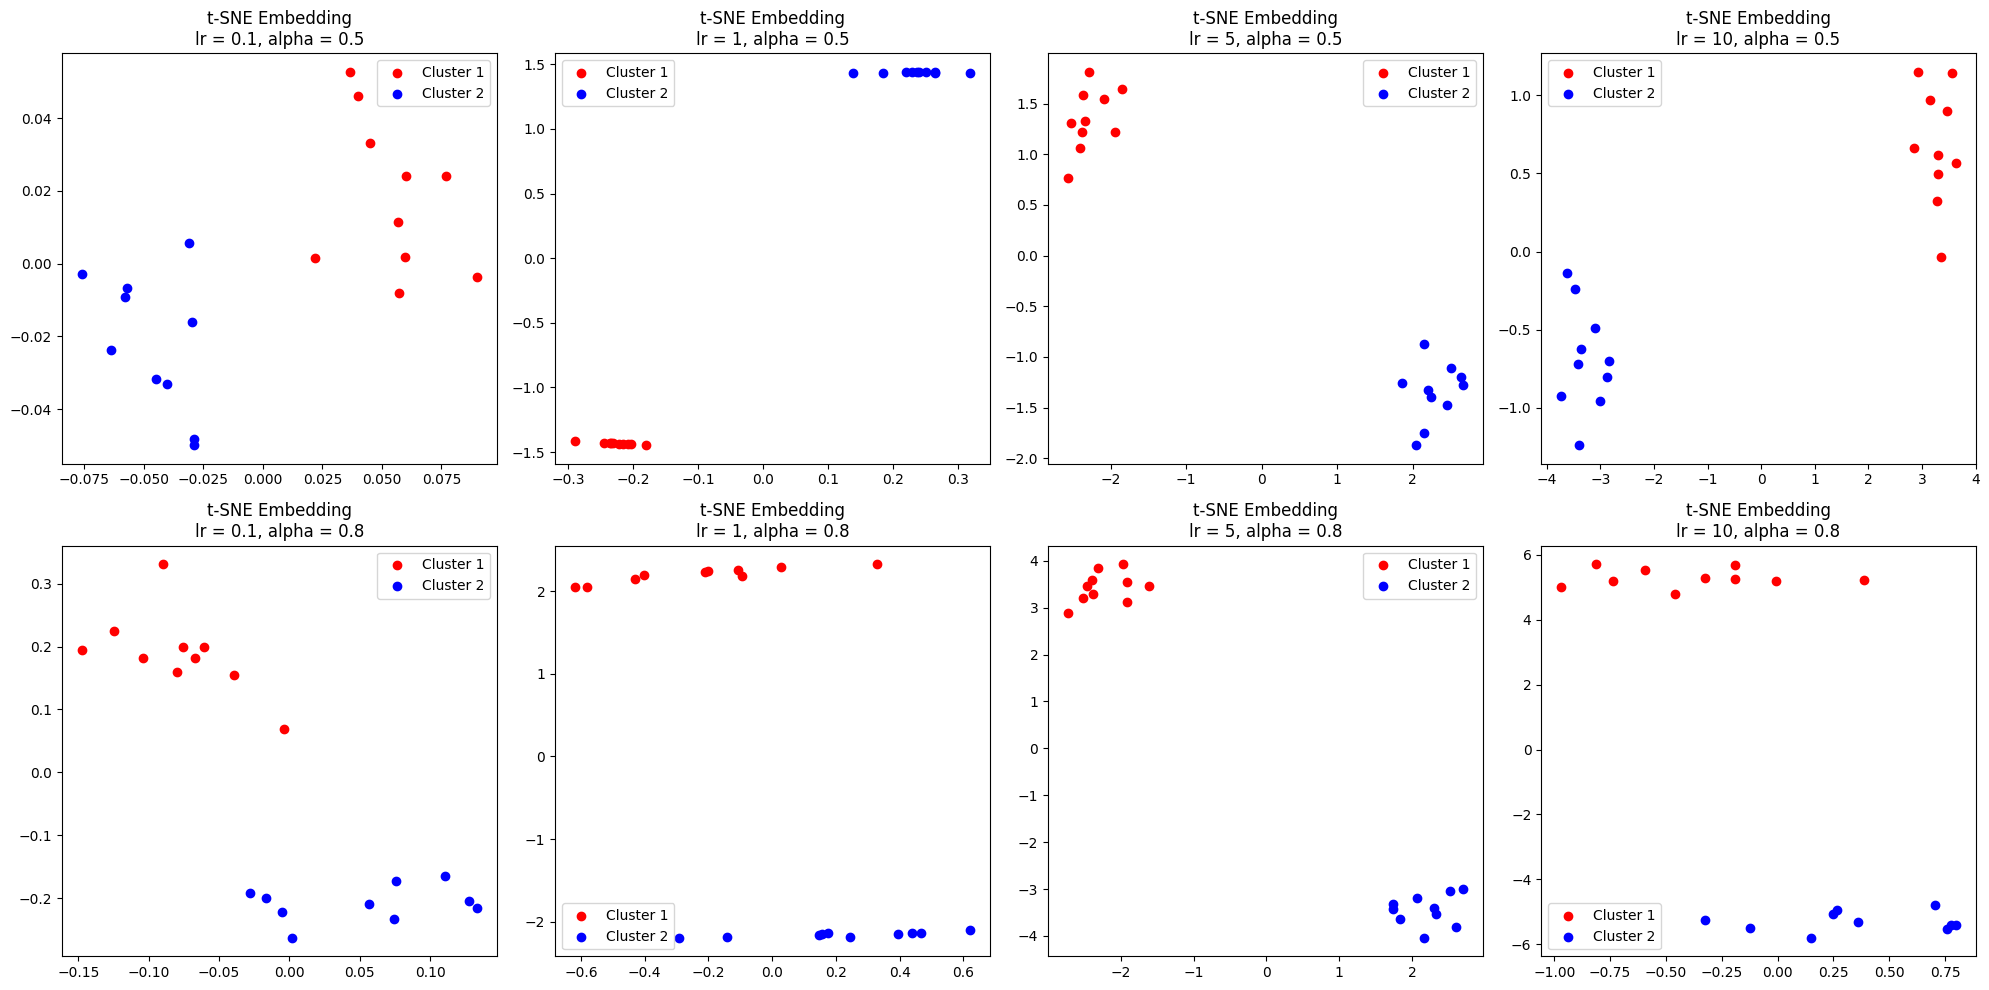

In [251]:
plt.figure(figsize=(20, 10))

for i in range(len(lr)):
    Y, KL_Div = t_SNE(X, 0.1, num_iter=T, learning_rate=lr[i], momentum=alpha[i], embedding_dim=embedding_dimension)
    plt.subplot(2, 4, i + 1)
    plt.scatter(Y[:num_points, 0], Y[:num_points, 1], color='r', label='Cluster 1')
    plt.scatter(Y[num_points:, 0], Y[num_points:, 1], color='b', label='Cluster 2')
    plt.title(f"t-SNE Embedding\nlr = {lr[i]}, alpha = {alpha[i]}")
    plt.legend()

plt.tight_layout()  # Adjusts subplot parameters to fit into the figure area.
plt.show()

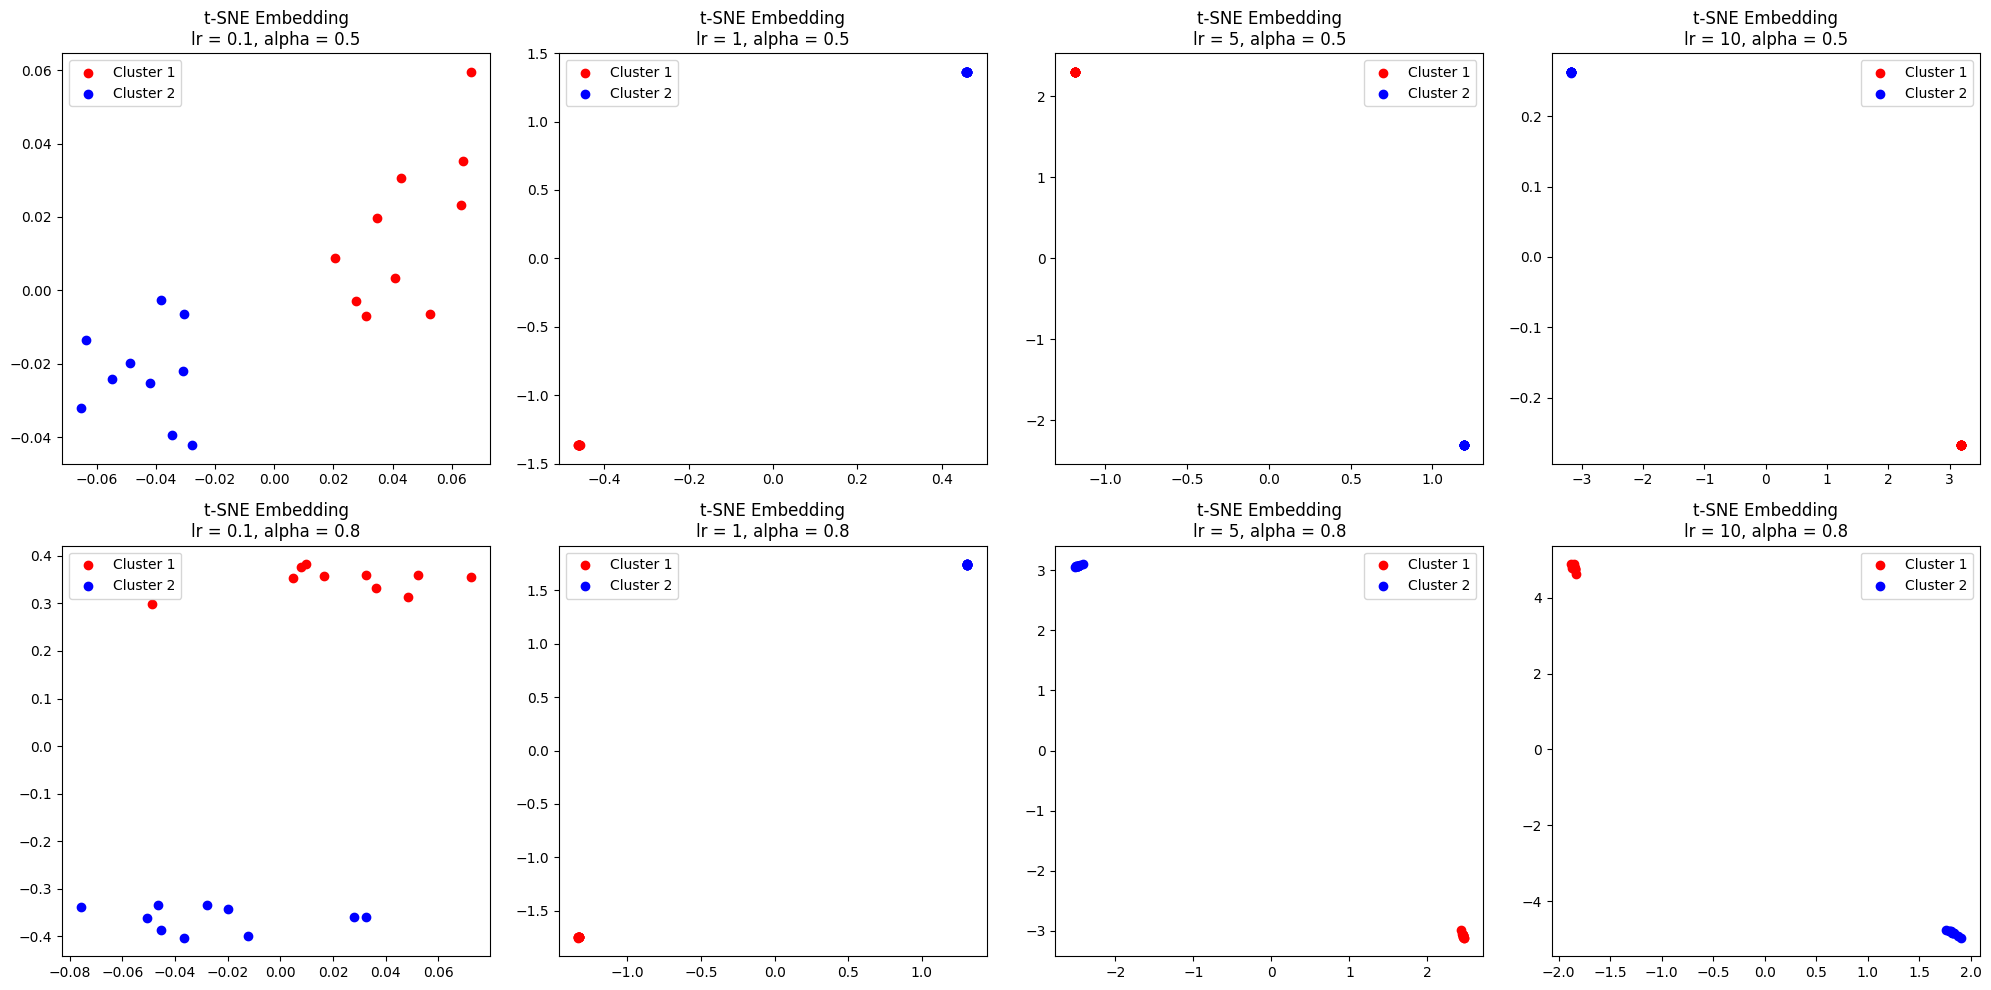

In [252]:
plt.figure(figsize=(20, 10))

for i in range(len(lr)):
    Y, KL_Div = t_SNE(X, 1, num_iter=T, learning_rate=lr[i], momentum=alpha[i], embedding_dim=embedding_dimension)
    plt.subplot(2, 4, i + 1)
    plt.scatter(Y[:num_points, 0], Y[:num_points, 1], color='r', label='Cluster 1')
    plt.scatter(Y[num_points:, 0], Y[num_points:, 1], color='b', label='Cluster 2')
    plt.title(f"t-SNE Embedding\nlr = {lr[i]}, alpha = {alpha[i]}")
    plt.legend()

plt.tight_layout()  # Adjusts subplot parameters to fit into the figure area.
plt.show()

From the plots, it is clear that the clusters are better for higher values of learning rate and higher values of sigma

In [253]:
dimension = 10
mean1 = np.ones(dimension)
mean2 = 10*np.ones(dimension)
cov = 0.01*np.eye(dimension)
num_points = 50

cluster1 = np.random.multivariate_normal(mean1, cov, num_points)
cluster2 = np.random.multivariate_normal(mean2, cov, num_points)

X = np.concatenate((cluster1, cluster2), axis = 0)

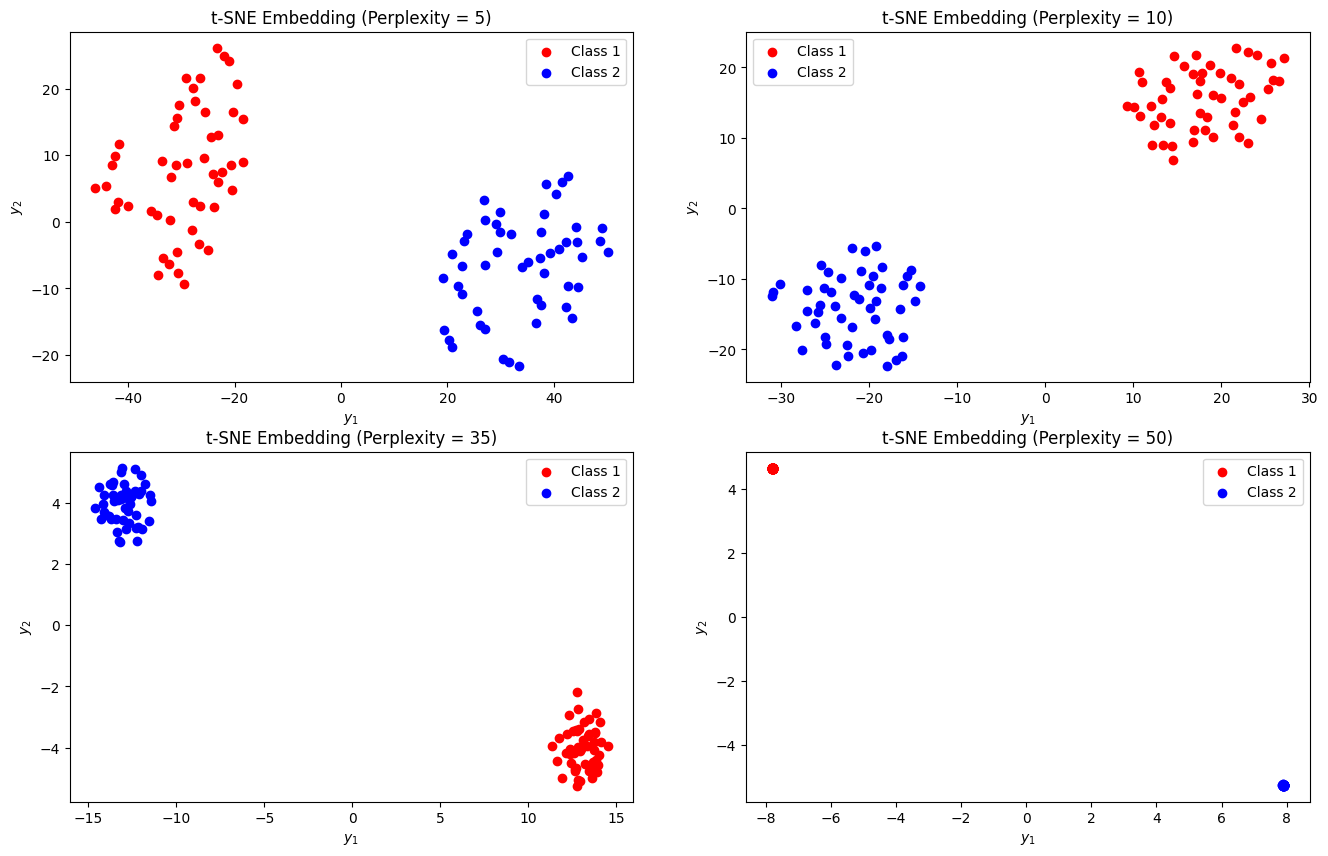

In [254]:
from sklearn.manifold import TSNE

perplexities = [5, 10, 35, 50]
plt.figure(figsize=(4*len(perplexities),10))
for i, perplexity in enumerate(perplexities):
    embeddings = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=perplexity).fit_transform(X) 
    plt.subplot(len(perplexities)//2, len(perplexities)//2, i+1)
    plt.scatter(embeddings[:num_points, 0], embeddings[:num_points, 1], label='Class 1', color = 'r')   
    plt.scatter(embeddings[num_points:, 0], embeddings[num_points:, 1], label='Class 2', color = 'b')
    plt.xlabel(r'$y_1$')
    plt.ylabel(r'$y_2$')
    plt.title(f't-SNE Embedding (Perplexity = {perplexity})')
    plt.legend()
plt.show()

From the plots, it is clear that the cluster become more compact as the perplexity increases. This is intuitive as an increase in perplexity results in an increase in the entropy of the distribution, which in turn increases the variance of the new distribution.